# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xjust\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = '58729c057eb84400a2d5c495b9b2b383'

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='relevancy')

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc = pd.DataFrame(sentiments)
btc

,text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909
5,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
6,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825
7,"Image caption, Bitcoin is accepted everywhere ...",0.2732,0.060,0.000,0.940
8,By Reuters Staff\r\nJan 26 (Reuters) - The U.S...,0.2500,0.145,0.090,0.765
9,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments1 = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments1.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth = pd.DataFrame(sentiments1)
eth

,text,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
5,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
6,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
7,"Last night, Twitter announced itll allow users...",0.2263,0.056,0.000,0.944
8,"Feb 7 (Reuters) - Polygon, a decentralized sca...",0.0000,0.000,0.000,1.000
9,"Online thieves made off with ""wrapped ethereum...",0.1027,0.131,0.092,0.778


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.151985,0.088850,0.047600,0.863600
std,0.468680,0.059173,0.059001,0.062236
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.272000,0.045750,0.000000,0.829500
50%,0.261600,0.073000,0.000000,0.862500
75%,0.585900,0.145250,0.090250,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.054765,0.053050,0.030550,0.916450
std,0.361855,0.073697,0.049529,0.087686
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.102700,0.000000,0.000000,0.822500
50%,0.000000,0.019500,0.000000,0.942500
75%,0.152575,0.063250,0.059750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had higher mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s'")
stop.append("n't")
stop.append("_")
stop.append("``")
stop.append("char")
stop.append("chars")
stop.append("''")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE! 
btc["tokens"] = btc.text.apply(tokenizer)
btc

,text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[Netflix, making, docuseries, one, worst, rapp..."
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[British, entrepreneur, financier, Richard, OD..."
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909,"[last, five, year, 25,000, Bitcoin, transferre..."
5,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[Even, cyberspace, Department, Justice, able, ..."
6,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825,"[couple, would, never, flee, country, risk, lo..."
7,"Image caption, Bitcoin is accepted everywhere ...",0.2732,0.060,0.000,0.940,"[Image, caption, Bitcoin, accepted, everywhere..."
8,By Reuters Staff\r\nJan 26 (Reuters) - The U.S...,0.2500,0.145,0.090,0.765,"[Reuters, Staff, Jan, 26, Reuters, U.S., Secur..."
9,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837,"[Sundays, Super, Bowl, ad, indication, crypto,..."


In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"] = btc.text.apply(tokenizer)
eth

,text,Compound,Positive,Negative,Neutral,tokens
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Israeli, national, Tal, Prihar, pled, guilty,..."
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[Netflix, making, docuseries, one, worst, rapp..."
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000,"[British, entrepreneur, financier, Richard, OD..."
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[last, five, year, 25,000, Bitcoin, transferre..."
5,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[Even, cyberspace, Department, Justice, able, ..."
6,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[couple, would, never, flee, country, risk, lo..."
7,"Last night, Twitter announced itll allow users...",0.2263,0.056,0.000,0.944,"[Image, caption, Bitcoin, accepted, everywhere..."
8,"Feb 7 (Reuters) - Polygon, a decentralized sca...",0.0000,0.000,0.000,1.000,"[Reuters, Staff, Jan, 26, Reuters, U.S., Secur..."
9,"Online thieves made off with ""wrapped ethereum...",0.1027,0.131,0.092,0.778,"[Sundays, Super, Bowl, ad, indication, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()),N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 3),
 (('Illustration', 'Alex'), 2),
 (('Alex', 'Castro'), 2),
 (('Castro', 'Verge'), 2),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('El', 'Salvador'), 2),
 (('Even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'Bitcoin'), 1),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1),
 (('noticed', 'value'), 1),
 (('value', 'plummeted'), 1),
 (('plummeted', 'last'), 1),
 (('last', 'week'), 1),
 (('week', 'total'), 1),
 (('total', 'value'), 1)]

In [39]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()),N)
Counter(grams).most_common(20)

[(('324', 'million'), 4),
 (('million', 'cryptocurrency'), 3),
 (('version', 'article'), 3),
 (('article', 'published'), 3),
 (('published', 'TIME'), 3),
 (('TIME', '’'), 3),
 (('’', 'newsletter'), 3),
 (('newsletter', 'Metaverse'), 3),
 (('Metaverse', 'Subscribe'), 3),
 (('Subscribe', 'weekly'), 3),
 (('weekly', 'guide'), 3),
 (('guide', 'future'), 3),
 (('find', 'past'), 3),
 (('past', 'issue'), 3),
 (('issue', 'newsletter'), 3),
 (('trading', 'volume'), 2),
 (('15', 'million'), 2),
 (('profile', 'picture'), 2),
 (('Online', 'thief'), 2),
 (('thief', 'made'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 13),
 ('Reuters', 6),
 ('…', 4),
 ('Feb', 4),
 ('cryptocurrency', 4),
 ('money', 3),
 ('one', 3),
 ('wallet', 3),
 ('bitcoin', 3),
 ('crypto', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('million', 7),
 ('cryptocurrency', 6),
 ('newsletter', 6),
 ('Ethereum', 4),
 ('ethereum', 4),
 ('Feb', 4),
 ('Reuters', 4),
 ('324', 4),
 ('find', 4),
 ('investment', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [55]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()


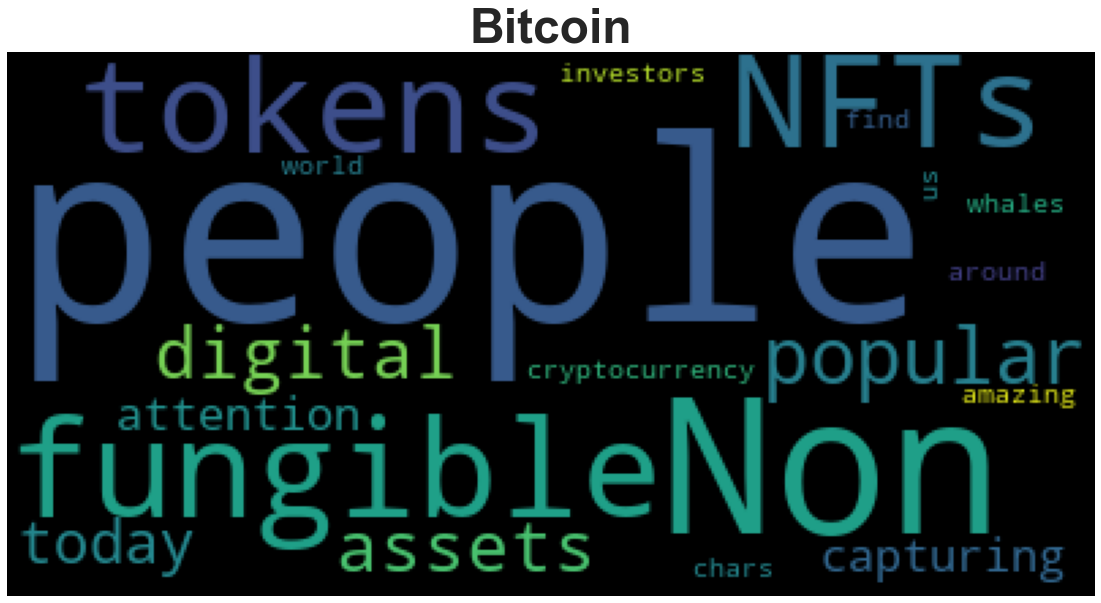

In [53]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud = WordCloud().generate(text)
title="Bitcoin"
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 48, "fontweight": "bold"}
plt.title(title, fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [59]:
import spacy
from spacy import displacy

In [60]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


     ---------------------------------------- 13.9/13.9 MB 7.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [61]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [62]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text= btc.text.str.cat()
all_btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved cohort: Bitcoin billionaires who want to buy a house.\r\nIn October, Poulde… [+3364 chars]Over the last five years, about 25,000 of those Bitcoin were transferred out of Mr. Lichtensteins wallet using a complicated series o

In [63]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [64]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [67]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one 2020 DATE
Reuters ORG
thousands CARDINAL
202 CARDINAL
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDI

---

### Ethereum NER

In [68]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text= btc.text.str.cat()
all_eth_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved cohort: Bitcoin billionaires who want to buy a house.\r\nIn October, Poulde… [+3364 chars]Over the last five years, about 25,000 of those Bitcoin were transferred out of Mr. Lichtensteins wallet using a complicated series o

In [69]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"

In [70]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [71]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one 2020 DATE
Reuters ORG
thousands CARDINAL
202 CARDINAL
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDI

---